a minor 1.0929080314916388


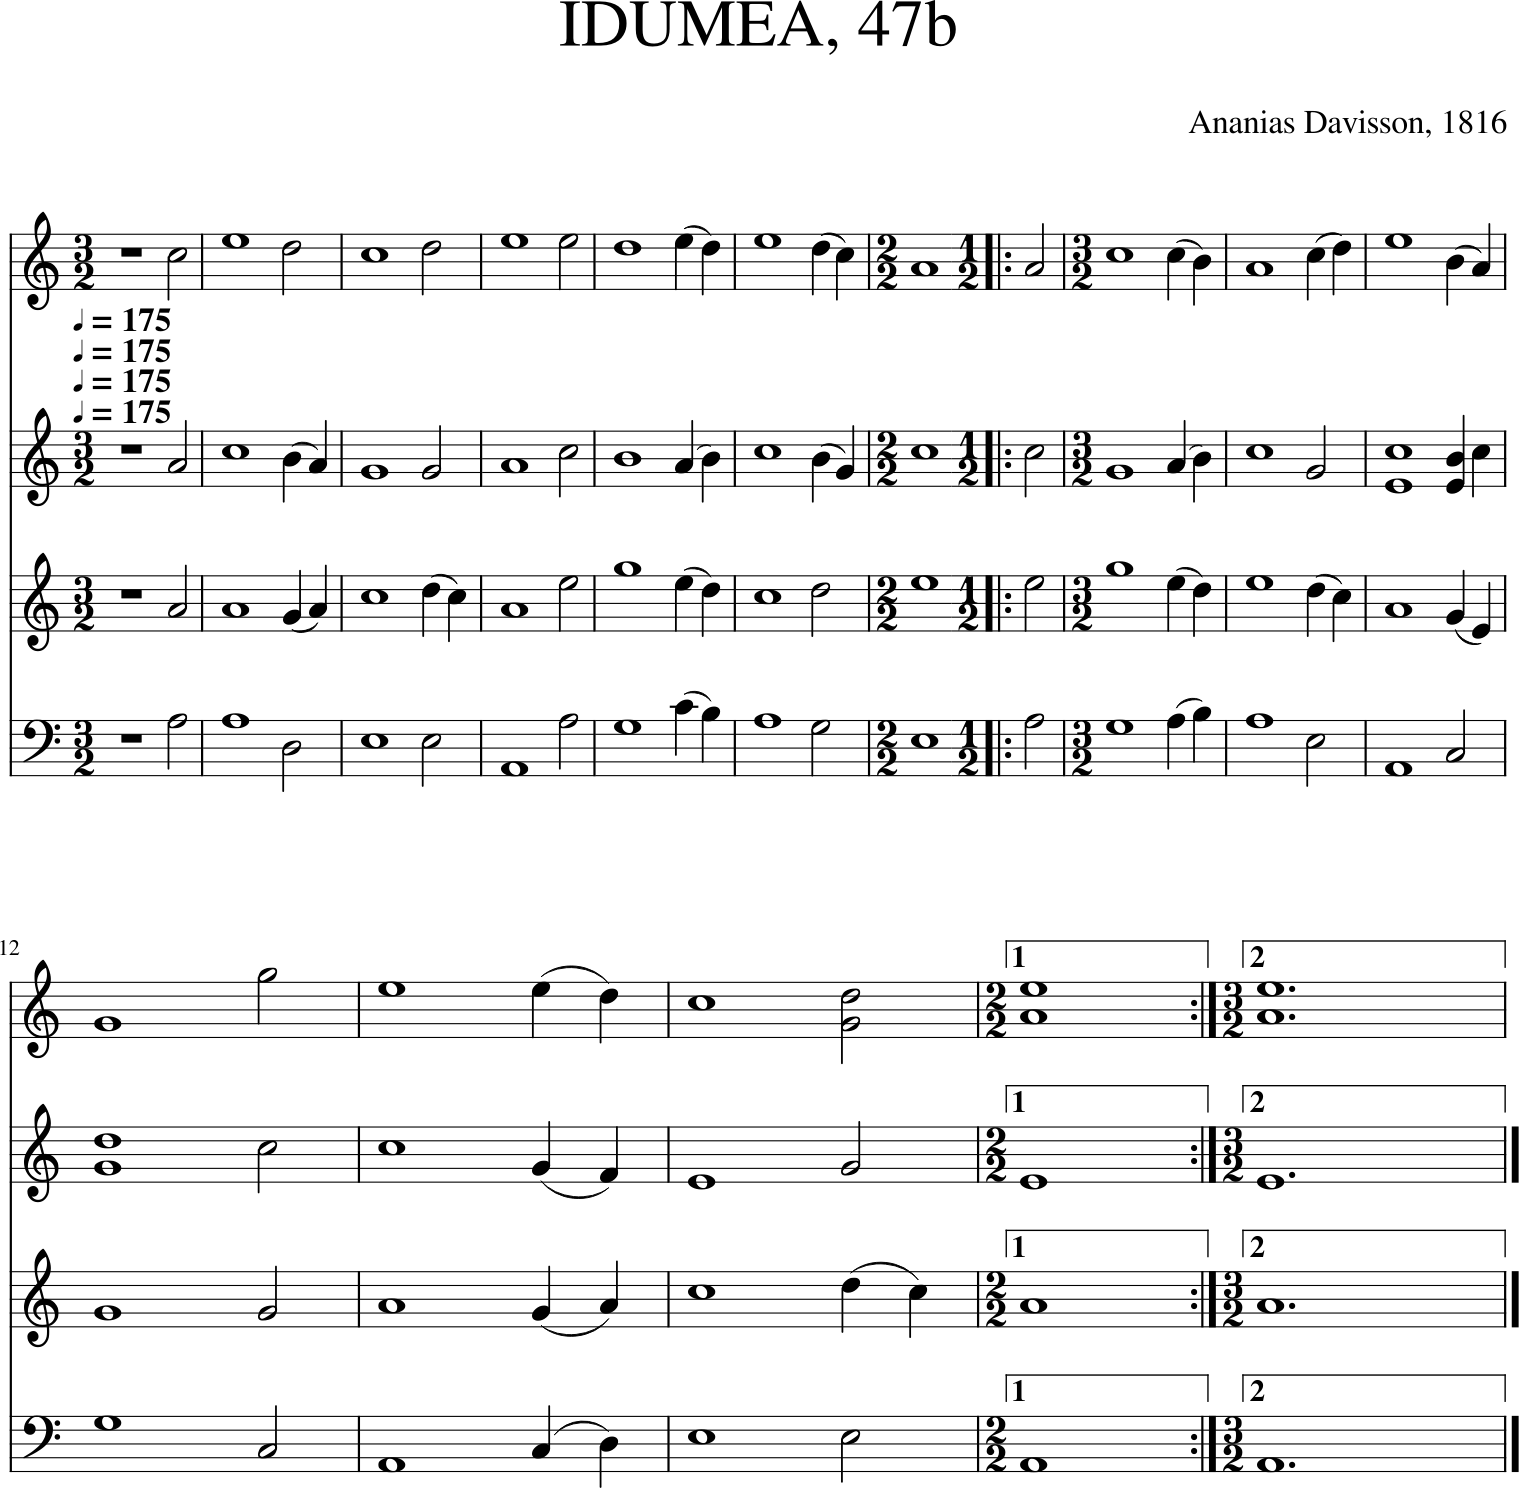

In [5]:
from music21 import *
#tune = converter.parse('./testFiles/CHN-103b.abc')
tune = converter.parse('./testFiles/47ba.abc')
k = tune.analyze('key')
print(k, k.tonalCertainty())
#print(k.alternateInterpretations[0].correlationCoefficient)

l = {}
for (i,k) in enumerate(["tr", "al", "te", "ba"]):
    l[k] = tune.parts[i]  

tune.show()

In [6]:
from copy import deepcopy

def getDegreeStringFromPart(part, k=None):
    if k is None: # Assume we want the relative major for solfege purposes
        k = part.analyze('key').getRelativeMajor()
    degrees = []
    # this doesn't handle choosers correctly!!
    # for instance in the alto line, the 513371251 in the
    # b part (measures 9 & 10) should yield 2 parts with:
    #  517121 and
    #  533 51 (spaces added for clarity)
    #for p in part.expandRepeats().pitches:
    for p in part.pitches:
        degrees.append(k.getScaleDegreeFromPitch(p))
    return ''.join(map(str,degrees))

def streamHasChord(s):
    return chord.Chord in map(type, s.flat.elements)

def getMeasures(s):
    return [m for m in s.iter if type(m) is stream.Measure]

def dechordMeasure(m):
    high = deepcopy(m)
    low = deepcopy(m)
    for (s,cmp) in [(high, max), (low, min)]:
        for e in s.elements:
            if isinstance(e,note.GeneralNote) and e.isChord:
                s.replace(e, note.Note(cmp(e.pitches), duration=e.duration))
    return (high, low)

def dechordPart(p):
    high = deepcopy(p)
    low = deepcopy(p)
    for (m,mh,ml) in zip(*(map(getMeasures,[p, high, low]))):
        if streamHasChord(m):
            h, l = dechordMeasure(m)
            high.replace(mh,h)
            low.replace(ml,l)
    return (high, low)

In [7]:
degseq = {}
for (voice,part) in l.items():
    degseq[voice] = getDegreeStringFromPart(part)
degseq

{'tr': '132123323232166117612376553321253636',
 'al': '617655617671751156715133712511543533',
 'te': '66561216353212335323216535565612166',
 'ba': '662336651765365676361516123366'}

In [8]:
degseq['tr'].find('232321')

7

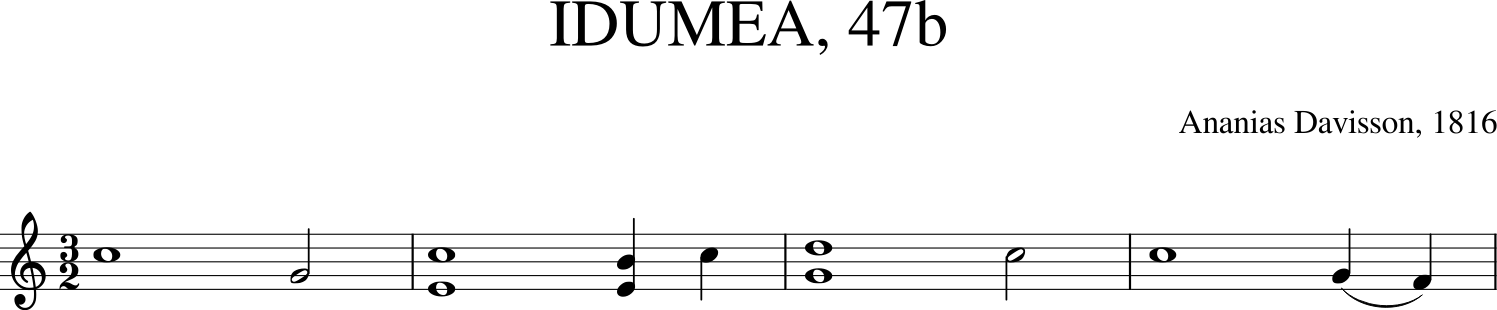

False
True
True
False


In [10]:
fragment = l['al'].measures(9,12)
fragment.show()

for m in getMeasures(fragment):
    print(streamHasChord(m))


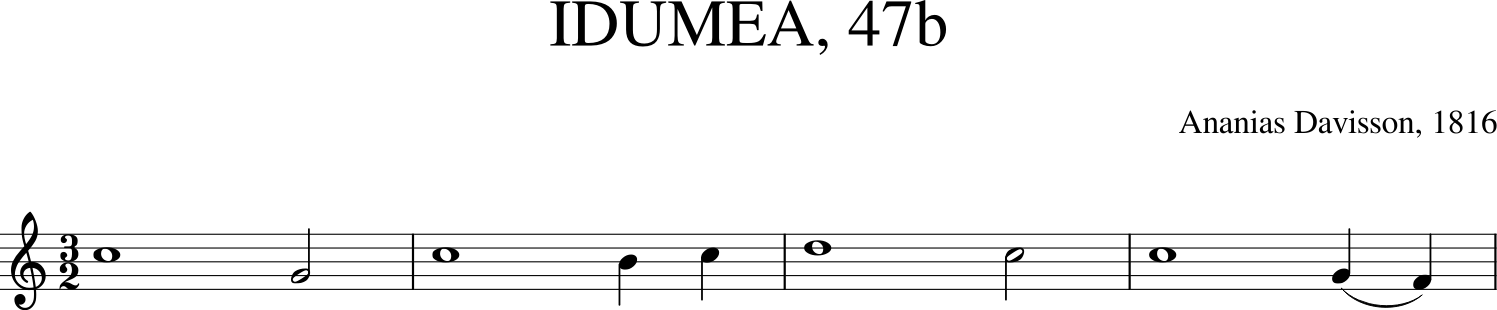

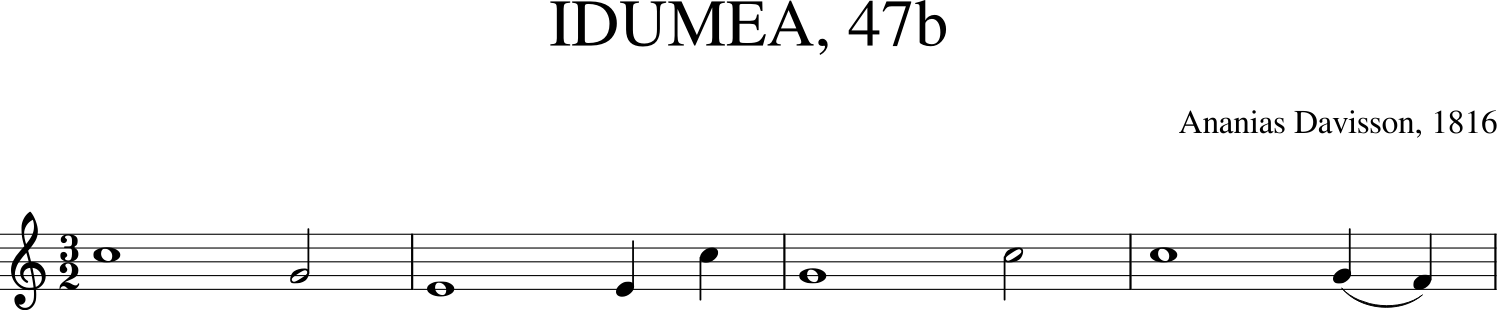

['636None676632', '1533151154']
<music21.duration.Duration 6.0>
<music21.duration.Duration 6.0>
<music21.duration.Duration 6.0>
<music21.duration.Duration 6.0>


In [12]:
hi,lo = dechordPart(fragment)
hi.show()
lo.show()

print(list(map(getDegreeStringFromPart,dechordPart(fragment))))

for m in getMeasures(fragment):
    print(m.duration)